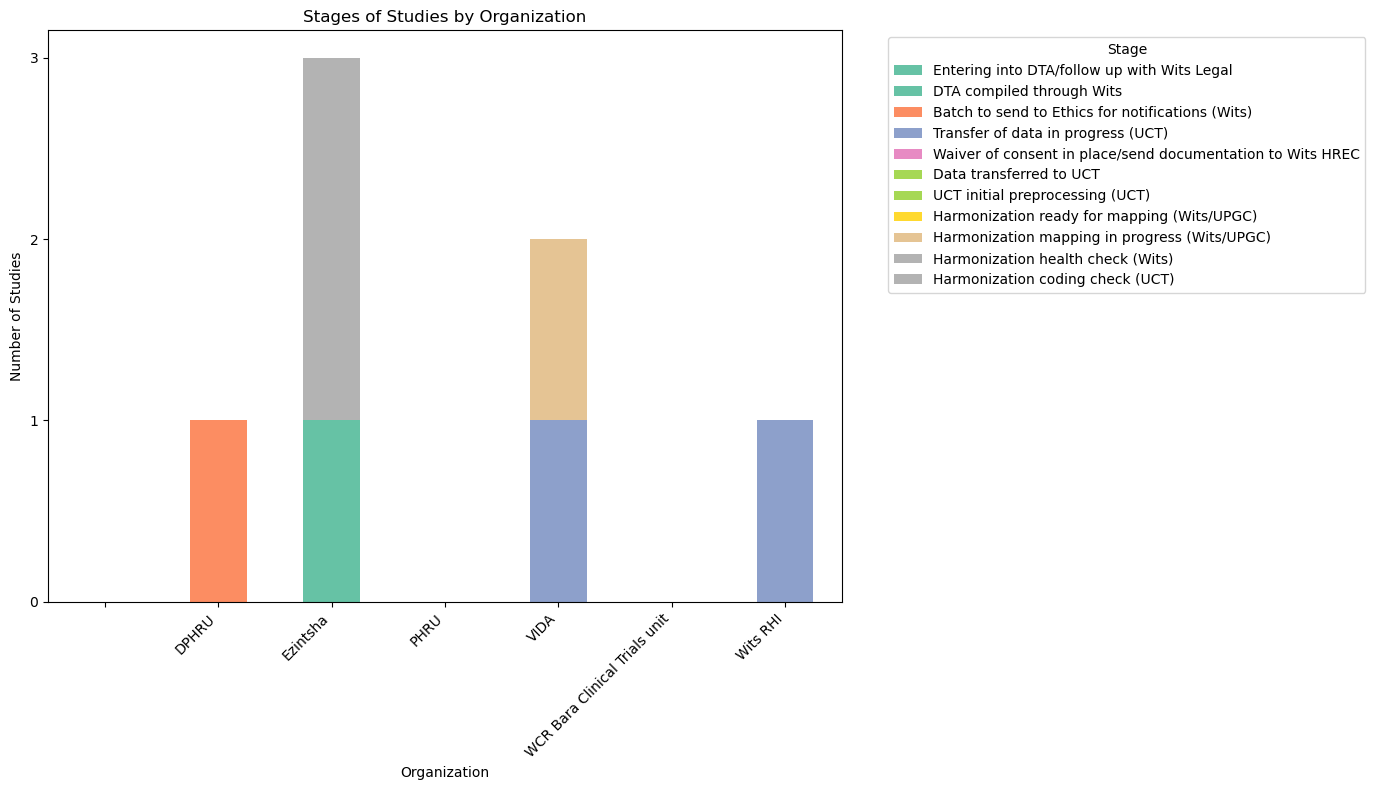

In [8]:
import json
import matplotlib.pyplot as plt
import pandas as pd

# Load the JSON file
file_path = 'RP2_JSON_0729.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Initialize the counters for each label
labels = {
    'PHRU': 0,
    'Wits RHI': 0,
    'CHRU': 0,
    'VIDA': 0,
    'Right to Care': 0,
    'Ezintsha': 0,
    'WCR Bara Clinical Trials unit': 0,
    'HE2RO': 0,
    'DPHRU': 0
}

# Dictionary to track stages for each label
stages = {label: {} for label in labels}

# Helper function to get the list name of a card
def get_list_name(card_id):
    for action in data['actions']:
        if action['type'] == 'updateCard' and action['data']['card']['id'] == card_id:
            if 'listAfter' in action['data']:
                return action['data']['listAfter']['name']
            if 'listBefore' in action['data']:
                return action['data']['listBefore']['name']
    return None

# Iterate over the cards to count and categorize by labels and stages
for card in data['cards']:
    if not card.get('closed', False):  # Skip archived cards
        card_labels = [label for label in card['labels'] if label['name'] in labels]
        list_name = get_list_name(card['id'])
        if list_name:
            for label in card_labels:
                label_name = label['name']
                labels[label_name] += 1
                if list_name not in stages[label_name]:
                    stages[label_name][list_name] = 0
                stages[label_name][list_name] += 1

# Reorder stages based on the Trello board order
stage_order = [
    "Entering into DTA/follow up with Wits Legal",
    "DTA compiled through Wits",
    "Batch to send to Ethics for notifications (Wits)",
    "Transfer of data in progress (UCT)",
    "Waiver of consent in place/send documentation to Wits HREC",
    "Data transferred to UCT",
    "UCT initial preprocessing (UCT)",
    "Harmonization ready for mapping (Wits/UPGC)",
    "Harmonization mapping in progress (Wits/UPGC)",
    "Harmonization health check (Wits)",
    "Harmonization coding check (UCT)"
]

# Prepare data for visualization
data_list = []
for org, stage_dict in stages.items():
    for stage, count in stage_dict.items():
        data_list.append([org, stage, count])

df = pd.DataFrame(data_list, columns=['Organization', 'Stage', 'Count'])

# Ensure all stages are in the DataFrame, even if some have no counts
missing_stages = [{'Organization': '', 'Stage': stage, 'Count': 0} for stage in stage_order if stage not in df['Stage'].values]
df = pd.concat([df, pd.DataFrame(missing_stages)], ignore_index=True)

# Pivot the DataFrame for easier plotting with stacked bars
df_pivot = df.pivot(index='Organization', columns='Stage', values='Count').fillna(0)
df_pivot = df_pivot[stage_order]  # Reorder columns

# Plotting with stacked bars and customized y-axis labels to show only whole numbers
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')

# Customize y-axis labels to be whole numbers only
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax.set_title('Stages of Studies by Organization')
ax.set_xlabel('Organization')
ax.set_ylabel('Number of Studies')
ax.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


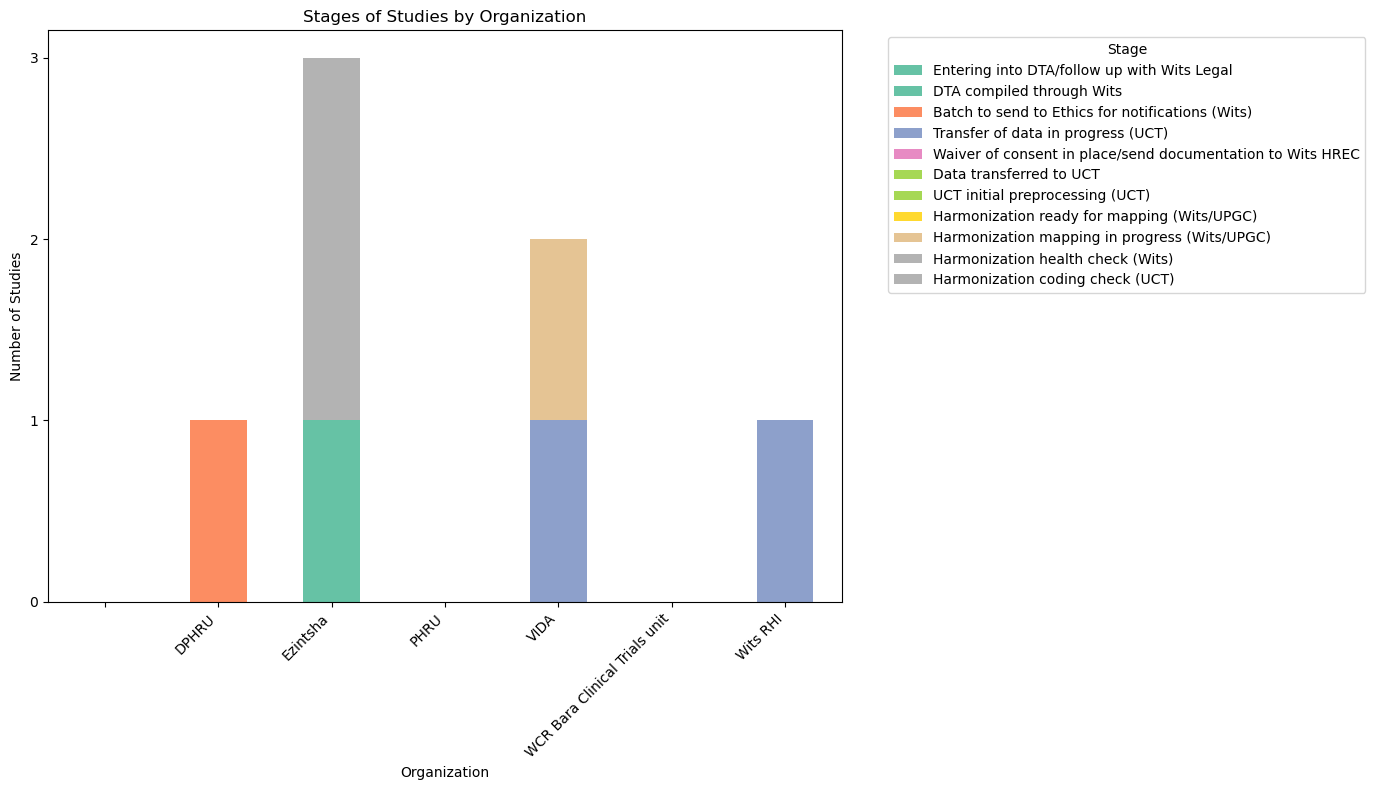

In [9]:
import json
import matplotlib.pyplot as plt
import pandas as pd

# Load the JSON file
file_path = 'RP2_JSON_0729.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Initialize the counters for each label
labels = {
    'PHRU': 0,
    'Wits RHI': 0,
    'CHRU': 0,
    'VIDA': 0,
    'Right to Care': 0,
    'Ezintsha': 0,
    'WCR Bara Clinical Trials unit': 0,
    'HE2RO': 0,
    'DPHRU': 0
}

# Dictionary to track stages for each label
stages = {label: {} for label in labels}

# Helper function to get the list name of a card
def get_list_name(card_id):
    for action in data['actions']:
        if action['type'] == 'updateCard' and action['data']['card']['id'] == card_id:
            if 'listAfter' in action['data']:
                return action['data']['listAfter']['name']
            if 'listBefore' in action['data']:
                return action['data']['listBefore']['name']
    return None

# Iterate over the cards to count and categorize by labels and stages
for card in data['cards']:
    if not card.get('closed', False):  # Skip archived cards
        card_labels = [label for label in card['labels'] if label['name'] in labels]
        list_name = get_list_name(card['id'])
        if list_name:
            for label in card_labels:
                label_name = label['name']
                labels[label_name] += 1
                if list_name not in stages[label_name]:
                    stages[label_name][list_name] = 0
                stages[label_name][list_name] += 1

# Reorder stages based on the Trello board order
stage_order = [
    "Entering into DTA/follow up with Wits Legal",
    "DTA compiled through Wits",
    "Batch to send to Ethics for notifications (Wits)",
    "Transfer of data in progress (UCT)",
    "Waiver of consent in place/send documentation to Wits HREC",
    "Data transferred to UCT",
    "UCT initial preprocessing (UCT)",
    "Harmonization ready for mapping (Wits/UPGC)",
    "Harmonization mapping in progress (Wits/UPGC)",
    "Harmonization health check (Wits)",
    "Harmonization coding check (UCT)"
]

# Prepare data for visualization
data_list = []
for org, stage_dict in stages.items():
    for stage, count in stage_dict.items():
        data_list.append([org, stage, count])

df = pd.DataFrame(data_list, columns=['Organization', 'Stage', 'Count'])

# Ensure all stages are in the DataFrame, even if some have no counts
missing_stages = [{'Organization': '', 'Stage': stage, 'Count': 0} for stage in stage_order if stage not in df['Stage'].values]
df = pd.concat([df, pd.DataFrame(missing_stages)], ignore_index=True)

# Pivot the DataFrame for easier plotting with stacked bars
df_pivot = df.pivot(index='Organization', columns='Stage', values='Count').fillna(0)
df_pivot = df_pivot[stage_order]  # Reorder columns

# Plotting with stacked bars and customized y-axis labels to show only whole numbers
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')

# Customize y-axis labels to be whole numbers only
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax.set_title('Stages of Studies by Organization')
ax.set_xlabel('Organization')
ax.set_ylabel('Number of Studies')
ax.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\CraigParker\AppData\Local\Temp\ipykernel_18112\1245302007.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels_count.keys(), rotation=45, ha='right')


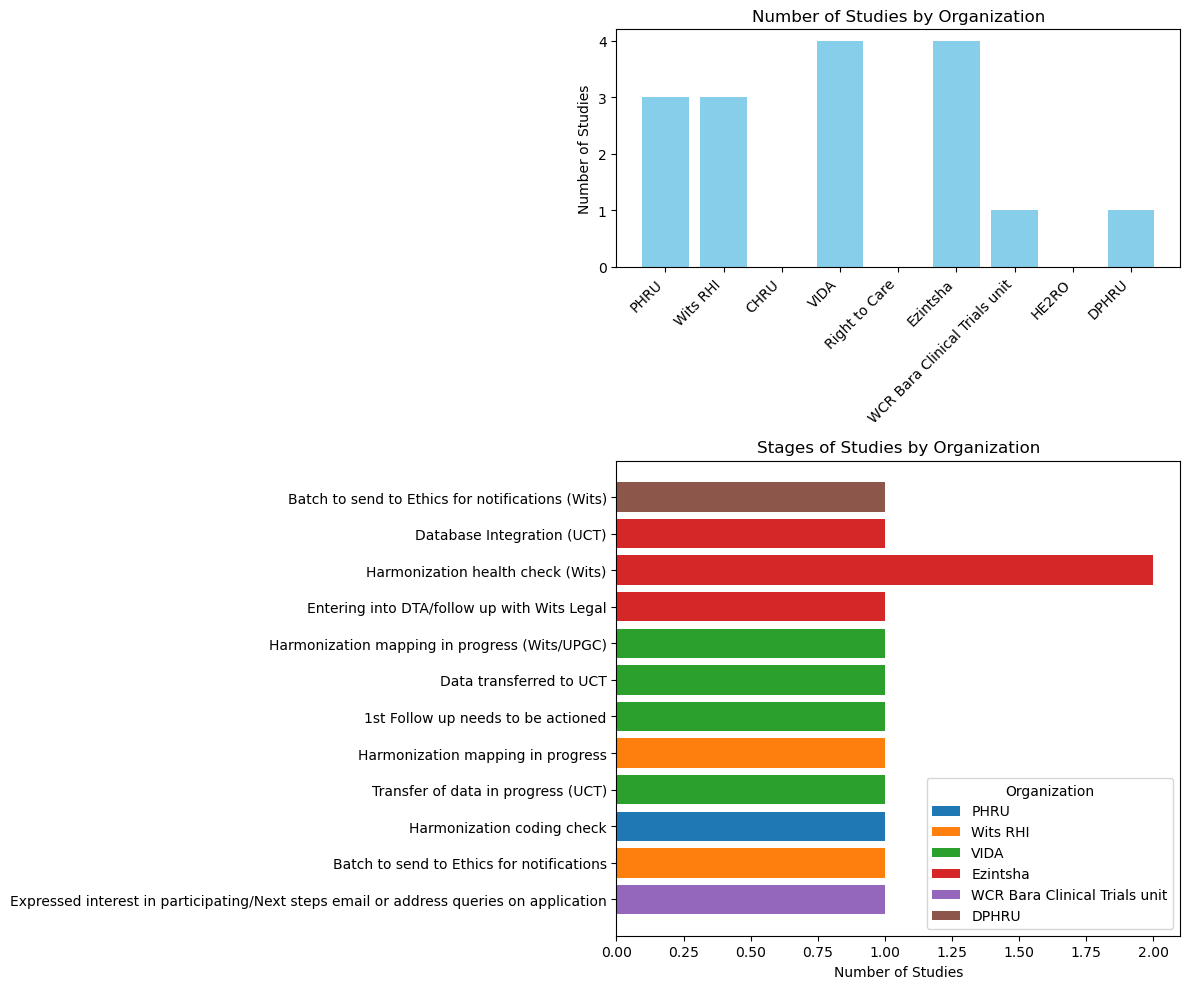

In [10]:
import matplotlib.pyplot as plt

# Data preparation
labels_count = {
    'PHRU': 3,
    'Wits RHI': 3,
    'CHRU': 0,
    'VIDA': 4,
    'Right to Care': 0,
    'Ezintsha': 4,
    'WCR Bara Clinical Trials unit': 1,
    'HE2RO': 0,
    'DPHRU': 1
}

stages_data = {
    'PHRU': {'Expressed interest in participating/Next steps email or address queries on application': 1,
             'Batch to send to Ethics for notifications': 1,
             'Harmonization coding check': 1},
    'Wits RHI': {'Batch to send to Ethics for notifications': 1,
                 'Transfer of data in progress (UCT)': 1,
                 'Harmonization mapping in progress': 1},
    'VIDA': {'1st Follow up needs to be actioned': 1,
             'Transfer of data in progress (UCT)': 1,
             'Data transferred to UCT': 1,
             'Harmonization mapping in progress (Wits/UPGC)': 1},
    'Ezintsha': {'Entering into DTA/follow up with Wits Legal': 1,
                 'Harmonization health check (Wits)': 2,
                 'Database Integration (UCT)': 1},
    'WCR Bara Clinical Trials unit': {'Expressed interest in participating/Next steps email or address queries on application': 1},
    'DPHRU': {'Batch to send to Ethics for notifications (Wits)': 1}
}

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [1, 2]})

# Plotting the total number of studies by organization
ax[0].bar(labels_count.keys(), labels_count.values(), color='skyblue')
ax[0].set_title('Number of Studies by Organization')
ax[0].set_ylabel('Number of Studies')
ax[0].set_xticklabels(labels_count.keys(), rotation=45, ha='right')

# Plotting the stages for each organization
for org, stages in stages_data.items():
    stages_list = list(stages.keys())
    stages_count = list(stages.values())
    ax[1].barh(stages_list, stages_count, label=org)

ax[1].set_title('Stages of Studies by Organization')
ax[1].set_xlabel('Number of Studies')
ax[1].legend(title='Organization')
plt.tight_layout()

# Display the plots
plt.show()


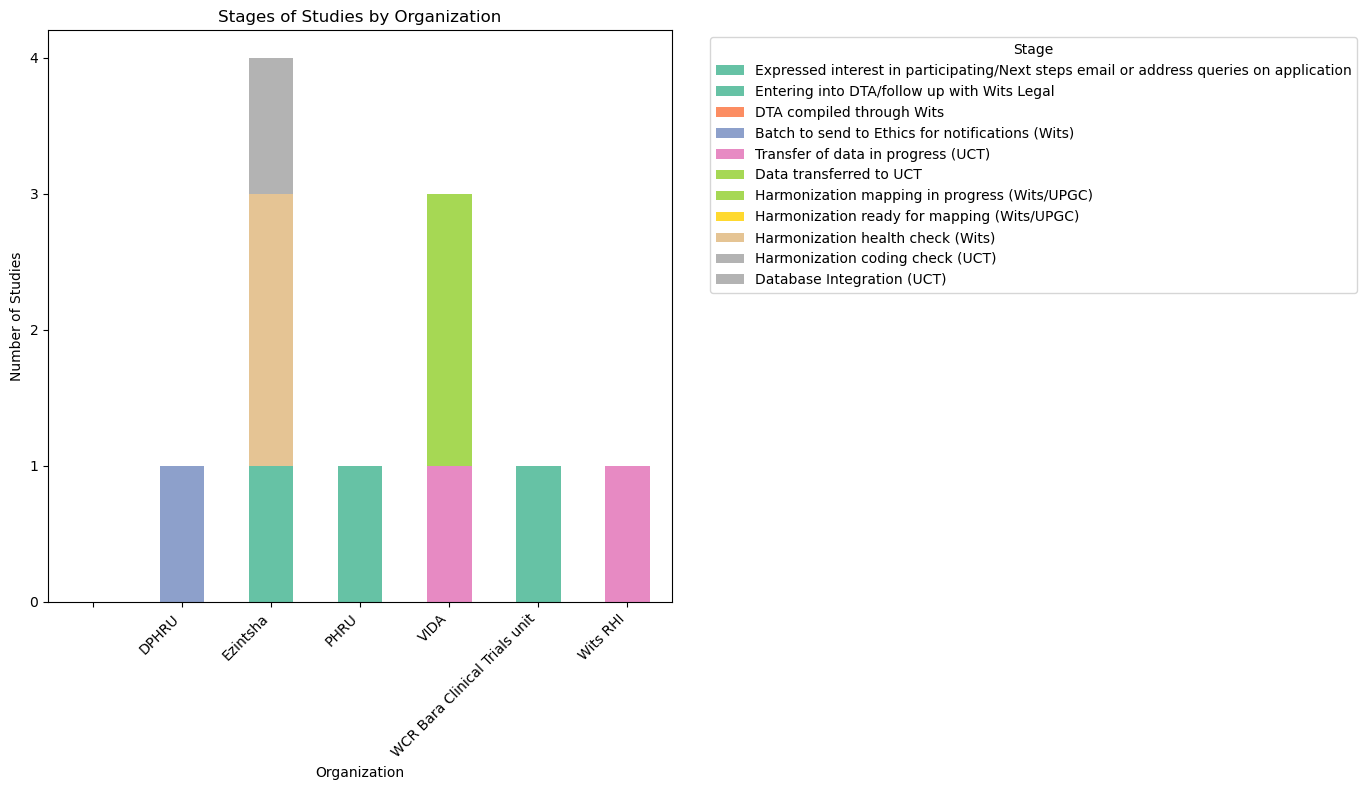

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated stages based on the provided image
stage_order = [
    "Expressed interest in participating/Next steps email or address queries on application",
    "Entering into DTA/follow up with Wits Legal",
    "DTA compiled through Wits",
    "Batch to send to Ethics for notifications (Wits)",
    "Transfer of data in progress (UCT)",
    "Data transferred to UCT",
    "Harmonization mapping in progress (Wits/UPGC)",
    "Harmonization ready for mapping (Wits/UPGC)",
    "Harmonization health check (Wits)",
    "Harmonization coding check (UCT)",
    "Database Integration (UCT)",
]

# Sample data preparation
stages_data = {
    'PHRU': {'Expressed interest in participating/Next steps email or address queries on application': 1,
             'Batch to send to Ethics for notifications': 1,
             'Harmonization coding check': 1},
    'Wits RHI': {'Batch to send to Ethics for notifications': 1,
                 'Transfer of data in progress (UCT)': 1,
                 'Harmonization mapping in progress': 1},
    'VIDA': {'1st Follow up needs to be actioned': 1,
             'Transfer of data in progress (UCT)': 1,
             'Data transferred to UCT': 1,
             'Harmonization mapping in progress (Wits/UPGC)': 1},
    'Ezintsha': {'Entering into DTA/follow up with Wits Legal': 1,
                 'Harmonization health check (Wits)': 2,
                 'Database Integration (UCT)': 1},
    'WCR Bara Clinical Trials unit': {'Expressed interest in participating/Next steps email or address queries on application': 1},
    'DPHRU': {'Batch to send to Ethics for notifications (Wits)': 1}
}

# Prepare data for the stacked bar graph
data_list = []
for org, stage_dict in stages_data.items():
    for stage, count in stage_dict.items():
        data_list.append([org, stage, count])

df = pd.DataFrame(data_list, columns=['Organization', 'Stage', 'Count'])

# Ensure all stages are in the DataFrame, even if some have no counts
missing_stages = [{'Organization': '', 'Stage': stage, 'Count': 0} for stage in stage_order if stage not in df['Stage'].values]
df = pd.concat([df, pd.DataFrame(missing_stages)], ignore_index=True)

# Pivot the DataFrame for easier plotting with stacked bars
df_pivot = df.pivot(index='Organization', columns='Stage', values='Count').fillna(0)
df_pivot = df_pivot[stage_order]  # Reorder columns

# Plotting with stacked bars and customized y-axis labels to show only whole numbers
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')

# Customize y-axis labels to be whole numbers only
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax.set_title('Stages of Studies by Organization')
ax.set_xlabel('Organization')
ax.set_ylabel('Number of Studies')
ax.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


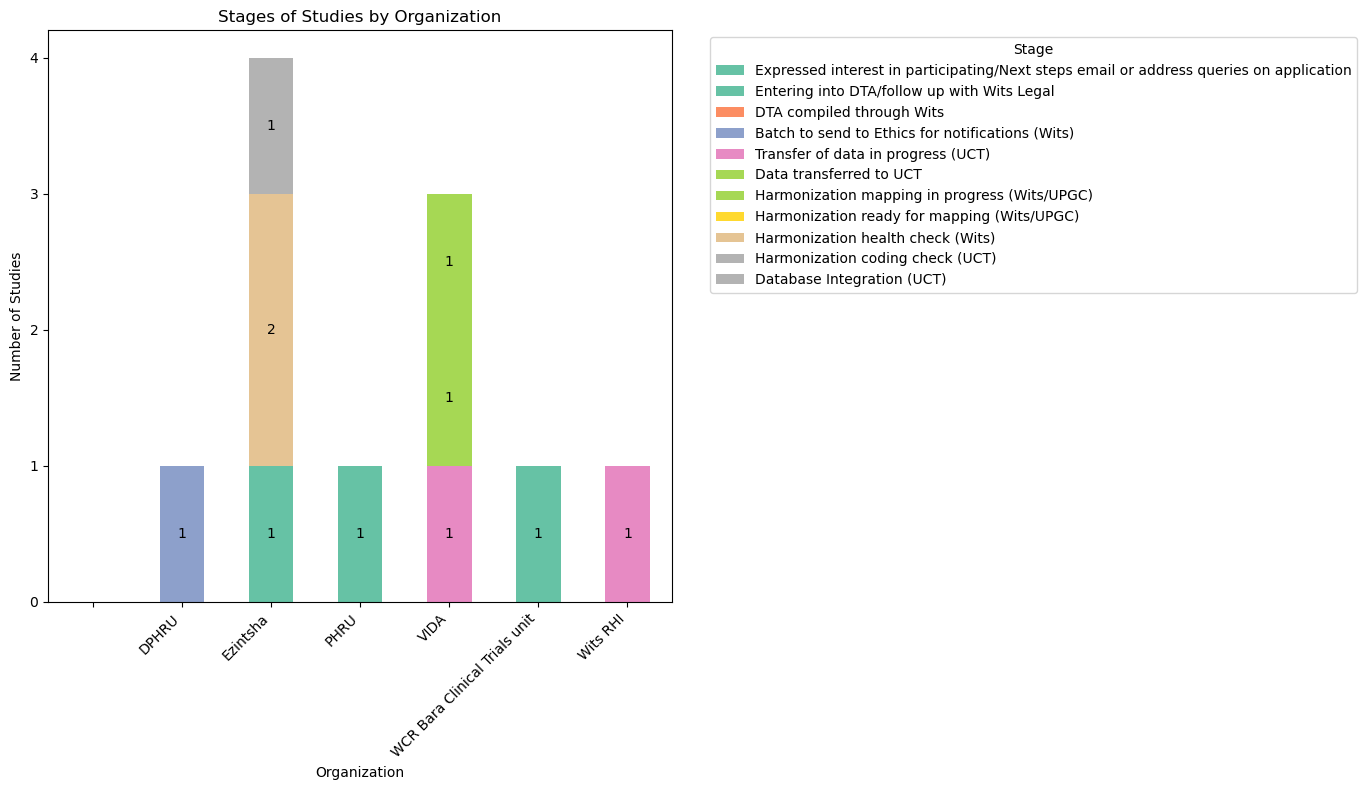

In [12]:
# Plotting with stacked bars and customized y-axis labels to show only whole numbers, including labels on the number of studies in each stack
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')

# Customize y-axis labels to be whole numbers only
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add labels on the number of studies in each stack
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add labels for non-zero values
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')

ax.set_title('Stages of Studies by Organization')
ax.set_xlabel('Organization')
ax.set_ylabel('Number of Studies')
ax.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


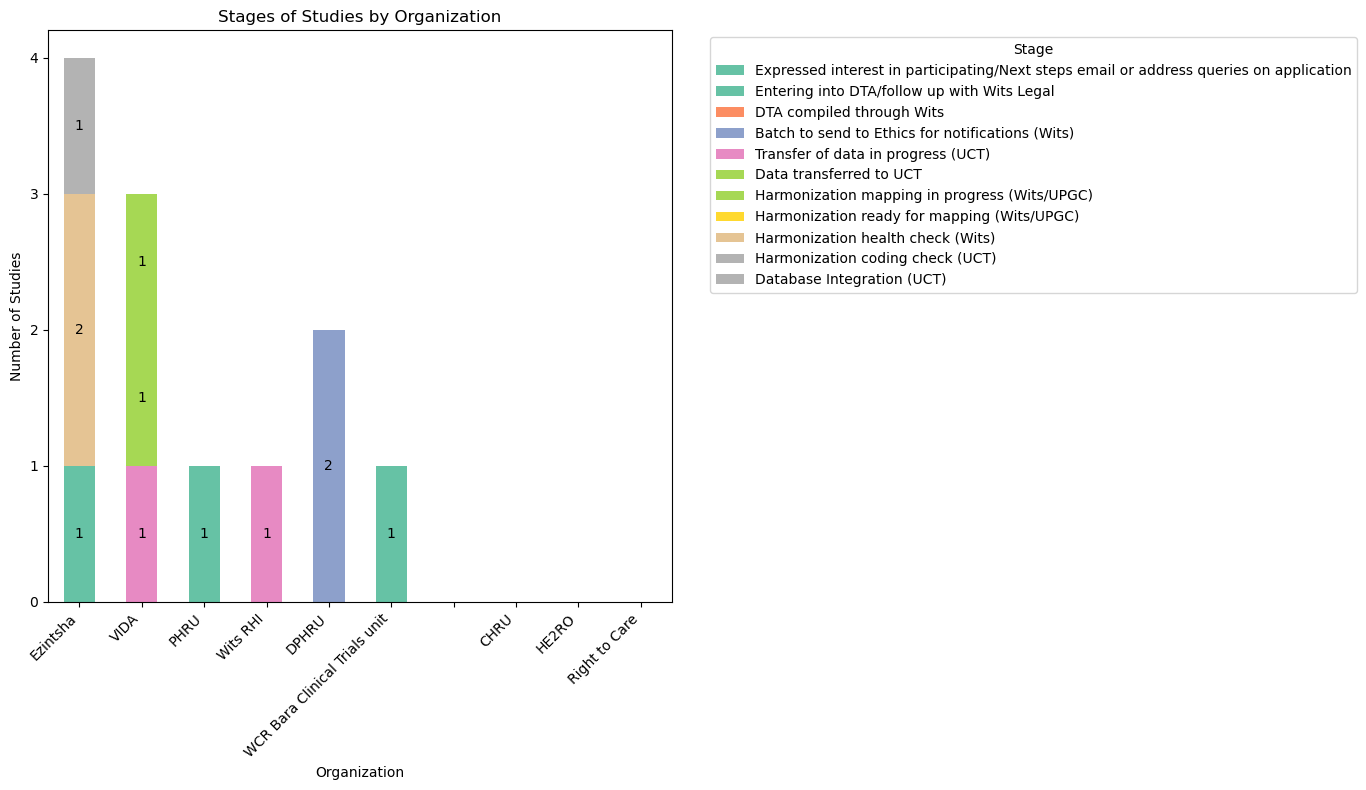

In [15]:
# Prepare data for the stacked bar graph, including CHRU and HE2RO with 0 studies
labels_count = {
    'PHRU': 3,
    'Wits RHI': 3,
    'CHRU': 0,
    'VIDA': 4,
    'Right to Care': 0,
    'Ezintsha': 4,
    'WCR Bara Clinical Trials unit': 1,
    'HE2RO': 0,
    'DPHRU': 2
}

stages_data = {
    'PHRU': {'Expressed interest in participating/Next steps email or address queries on application': 1,
             'Batch to send to Ethics for notifications': 1,
             'Harmonization coding check': 1},
    'Wits RHI': {'Batch to send to Ethics for notifications': 1,
                 'Transfer of data in progress (UCT)': 1,
                 'Harmonization mapping in progress': 1},
    'VIDA': {'1st Follow up needs to be actioned': 1,
             'Transfer of data in progress (UCT)': 1,
             'Data transferred to UCT': 1,
             'Harmonization mapping in progress (Wits/UPGC)': 1},
    'Ezintsha': {'Entering into DTA/follow up with Wits Legal': 1,
                 'Harmonization health check (Wits)': 2,
                 'Database Integration (UCT)': 1},
    'WCR Bara Clinical Trials unit': {'Expressed interest in participating/Next steps email or address queries on application': 1},
    'DPHRU': {'Batch to send to Ethics for notifications (Wits)': 2},
    'CHRU': {},
    'HE2RO': {}
}

# Prepare data for the stacked bar graph
data_list = []
for org, stage_dict in stages_data.items():
    for stage, count in stage_dict.items():
        data_list.append([org, stage, count])

df = pd.DataFrame(data_list, columns=['Organization', 'Stage', 'Count'])

# Ensure all stages are in the DataFrame, even if some have no counts
missing_stages = [{'Organization': '', 'Stage': stage, 'Count': 0} for stage in stage_order if stage not in df['Stage'].values]
df = pd.concat([df, pd.DataFrame(missing_stages)], ignore_index=True)

# Ensure all organizations are included
for org in labels_count.keys():
    if org not in df['Organization'].values:
        df = pd.concat([df, pd.DataFrame([{'Organization': org, 'Stage': '', 'Count': 0}])], ignore_index=True)

# Sum the total studies per organization for ordering
total_studies = df.groupby('Organization')['Count'].sum().reset_index()
total_studies = total_studies.sort_values(by='Count', ascending=False)

# Sort the DataFrame by the total studies
df['Organization'] = pd.Categorical(df['Organization'], categories=total_studies['Organization'], ordered=True)
df = df.sort_values('Organization')

# Pivot the DataFrame for easier plotting with stacked bars
df_pivot = df.pivot(index='Organization', columns='Stage', values='Count').fillna(0)
df_pivot = df_pivot[stage_order]  # Reorder columns

# Plotting with stacked bars and customized y-axis labels to show only whole numbers, including labels on the number of studies in each stack
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')

# Customize y-axis labels to be whole numbers only
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add labels on the number of studies in each stack
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add labels for non-zero values
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')

ax.set_title('Stages of Studies by Organization')
ax.set_xlabel('Organization')
ax.set_ylabel('Number of Studies')
ax.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\CraigParker\AppData\Local\Temp\ipykernel_18112\1369657804.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['Organization', 'Stage'], as_index=False).sum()


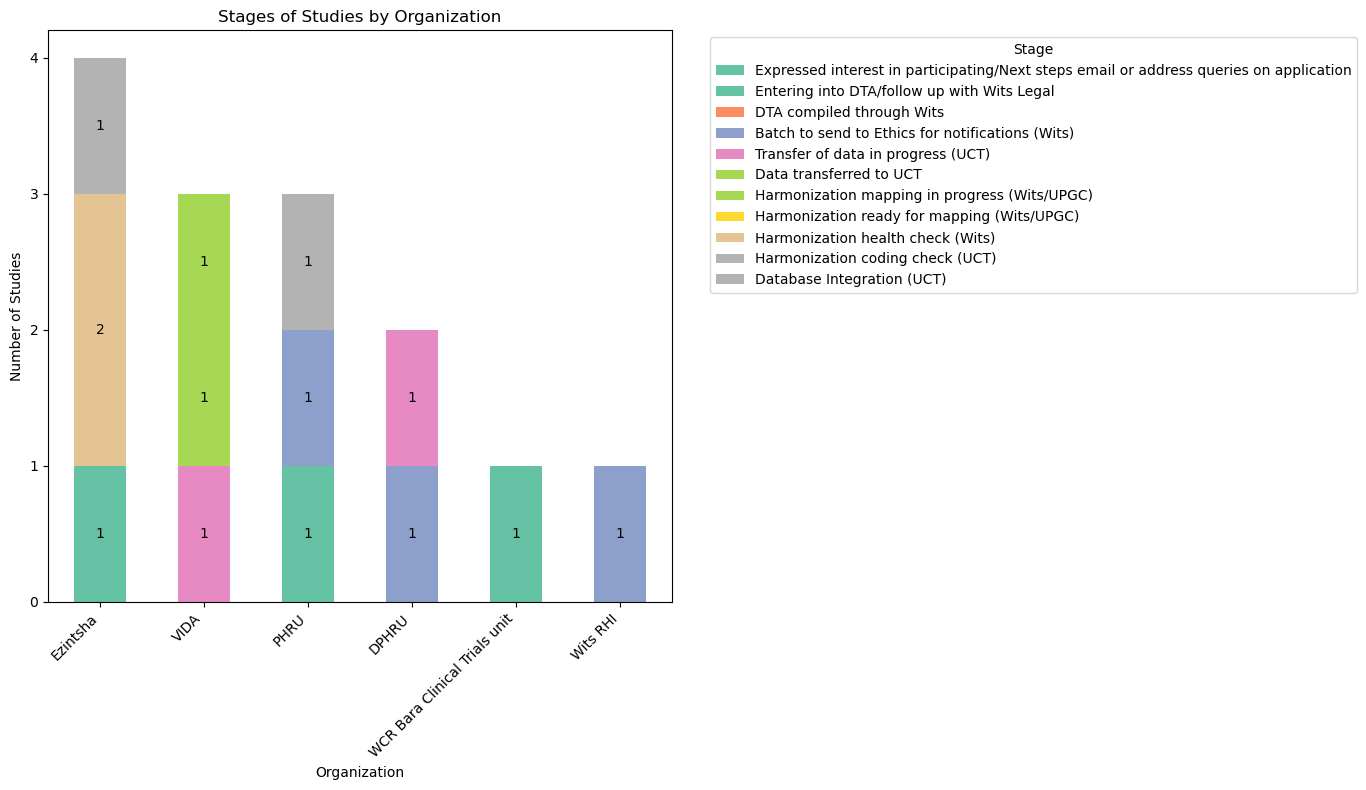

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated stages based on the provided image
stage_order = [
    "Expressed interest in participating/Next steps email or address queries on application",
    "Entering into DTA/follow up with Wits Legal",
    "DTA compiled through Wits",
    "Batch to send to Ethics for notifications (Wits)",
    "Transfer of data in progress (UCT)",
    "Data transferred to UCT",
    "Harmonization mapping in progress (Wits/UPGC)",
    "Harmonization ready for mapping (Wits/UPGC)",
    "Harmonization health check (Wits)",
    "Harmonization coding check (UCT)",
    "Database Integration (UCT)",
]

# Sample data preparation
stages_data = {
    'PHRU': {'Expressed interest in participating/Next steps email or address queries on application': 1,
             'Batch to send to Ethics for notifications (Wits)': 1,
             'Harmonization coding check (UCT)': 1},
    'Wits RHI': {'Batch to send to Ethics for notifications (Wits)': 1,},
    'VIDA': {'1st Follow up needs to be actioned': 1,
             'Transfer of data in progress (UCT)': 1,
             'Data transferred to UCT': 1,
             'Harmonization mapping in progress (Wits/UPGC)': 1},
    'Ezintsha': {'Entering into DTA/follow up with Wits Legal': 1,
                 'Harmonization health check (Wits)': 2,
                 'Database Integration (UCT)': 1},
    'WCR Bara Clinical Trials unit': {'Expressed interest in participating/Next steps email or address queries on application': 1},
    'DPHRU': {'Batch to send to Ethics for notifications (Wits)': 1,
              'Transfer of data in progress (UCT)': 1},
    'CHRU': {},
    'HE2RO': {},
    'Right to Care': {}
}

# Prepare data for the stacked bar graph
data_list = []
for org, stage_dict in stages_data.items():
    for stage, count in stage_dict.items():
        data_list.append([org, stage, count])

df = pd.DataFrame(data_list, columns=['Organization', 'Stage', 'Count'])

# Ensure all stages are in the DataFrame, even if some have no counts
missing_stages = [{'Organization': '', 'Stage': stage, 'Count': 0} for stage in stage_order if stage not in df['Stage'].values]
df = pd.concat([df, pd.DataFrame(missing_stages)], ignore_index=True)

# Ensure all organizations are included
for org in stages_data.keys():
    if org not in df['Organization'].values:
        df = pd.concat([df, pd.DataFrame([{'Organization': org, 'Stage': '', 'Count': 0}])], ignore_index=True)

# Sum the total studies per organization for ordering
total_studies = df.groupby('Organization')['Count'].sum().reset_index()
total_studies = total_studies.sort_values(by='Count', ascending=False)

# Filter out organizations with zero studies
total_studies = total_studies[total_studies['Count'] > 0]

# Sort the DataFrame by the total studies
df['Organization'] = pd.Categorical(df['Organization'], categories=total_studies['Organization'], ordered=True)
df = df.sort_values('Organization')

# Group by organization and stage to ensure uniqueness
df = df.groupby(['Organization', 'Stage'], as_index=False).sum()

# Pivot the DataFrame for easier plotting with stacked bars
df_pivot = df.pivot(index='Organization', columns='Stage', values='Count').fillna(0)
df_pivot = df_pivot[stage_order]  # Reorder columns

# Plotting with stacked bars and customized y-axis labels to show only whole numbers, including labels on the number of studies in each stack
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')

# Customize y-axis labels to be whole numbers only
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add labels on the number of studies in each stack
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add labels for non-zero values
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')

ax.set_title('Stages of Studies by Organization')
ax.set_xlabel('Organization')
ax.set_ylabel('Number of Studies')
ax.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()
